In [1]:
# Install required packages (only needed once)
!pip install requests beautifulsoup4 pandas


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://remoteok.io/remote-dev+python-jobs"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

jobs = soup.find_all("tr", class_="job")

job_data = []
for job in jobs:
    title = job.find("h2")
    company = job.find("h3")
    tags = job.find_all("div", class_="tag")

    job_data.append({
        "Job Title": title.text.strip() if title else "",
        "Company": company.text.strip() if company else "",
        "Tags": [tag.text.strip() for tag in tags]
    })

df = pd.DataFrame(job_data)
df.head()


,Job Title,Company,Tags
0,Backend Developer @ lobstr.io Python Scraping ...,lobstr.io,"[Backend, Redis, Remote, API, Tech Lead, Docke..."
1,Lead Data Engineer,Open Architects,"[Engineer, DevOps, Data, DataOps]"
2,Senior Python Backend Engineer,Orga AI,"[Senior, Backend, Ops, Startup, AWS]"
3,Senior Back End Wizard,joi.studio,"[Engineer, JavaScript, Backend, Cloud, Full St..."
4,Senior Staff Software Engineer Backend Python,Close,"[Engineer, Senior, Backend, SaaS, Travel, Star..."


In [4]:
# Flatten all skill tags into one big list
all_skills = [skill for tags in df['Tags'] for skill in tags]

# Convert to a Pandas Series and count frequencies
skill_counts = pd.Series(all_skills).value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Display top 10 skills
skill_counts.head(10)


,Skill,Count
0,Backend,12
1,Engineer,12
2,JavaScript,9
3,Senior,8
4,English,7
5,DevOps,6
6,Full Stack,6
7,React,6
8,Engineering,6
9,API,6


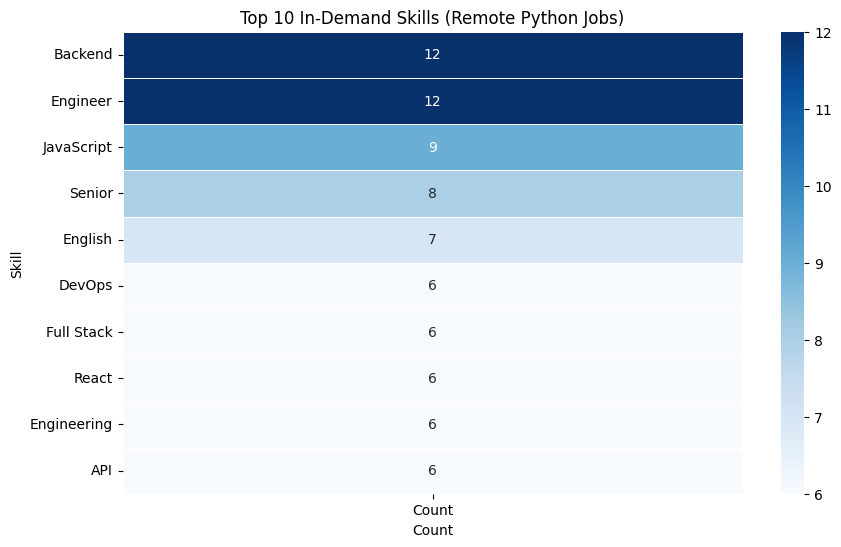

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 skills
top_skills = skill_counts.head(10)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_skills.set_index('Skill'), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Top 10 In-Demand Skills (Remote Python Jobs)")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


In [7]:
# First extract common roles from job titles
df['Role'] = df['Job Title'].str.extract(r'(Data Engineer|Backend Engineer|Full Stack|Developer|Engineer)', expand=False)

# Fill missing with "Other"
df['Role'] = df['Role'].fillna('Other')

# Now create Skill vs Role matrix
from collections import defaultdict

# Create a mapping of Role → Skill Count
role_skill_map = defaultdict(lambda: defaultdict(int))

for _, row in df.iterrows():
    role = row['Role']
    for skill in row['Tags']:
        role_skill_map[role][skill] += 1

# Convert to DataFrame
role_skill_df = pd.DataFrame(role_skill_map).fillna(0).astype(int).T
role_skill_df.head()



,Backend,Redis,Remote,API,Tech Lead,Docker,Cybersecurity,Architecture,Developer,Software,...,Java,C,C Plus Plus,Angular,Lambda,Apache,Laravel,CSS,HTML,Wordpress
Developer,4,2,1,3,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Data Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Backend Engineer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Engineer,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Top skill per role
for role in role_skill_df.index:
    top_skill = role_skill_df.loc[role].idxmax()
    count = role_skill_df.loc[role].max()
    print(f"🔹 For the role '{role}', the most in-demand skill is '{top_skill}' (mentioned {count} times).")


🔹 For the role 'Developer', the most in-demand skill is 'Senior' (mentioned 5 times).
🔹 For the role 'Data Engineer', the most in-demand skill is 'Engineer' (mentioned 1 times).
🔹 For the role 'Backend Engineer', the most in-demand skill is 'Backend' (mentioned 1 times).
🔹 For the role 'Other', the most in-demand skill is 'Backend' (mentioned 1 times).
🔹 For the role 'Engineer', the most in-demand skill is 'Engineer' (mentioned 6 times).
🔹 For the role 'Full Stack', the most in-demand skill is 'Backend' (mentioned 3 times).
